In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import and explore dataset

In [3]:
# Import dataset
project_dir = 'D:/HUB/'
policy_data = pd.read_excel(project_dir + 'Policy Data.xlsx', sheet_name='policy')

In [24]:
# Print the shape of the dataset
policy_data.shape

(287594, 22)

In [6]:
# Print the first five rows of the dataset
policy_data.head()

,Cust_ID,Pol_polidx,Effective,Expires,Fwritten,LOB,Pol_type,Postal,Age_FirstWritten,Min_Continued_Ins,...,Driver_Count,Vehicle_Count,Years_Licensed_at_FW,Licsusp6yr,Licsusp,Inscancl3y,Matmisrepr,FirstTerm_Premium,SecondTerm_Premium,ThirdTerm_Premium
0,10493-1,10493-1-1001,2022-11-12,2023-11-12,2022-11-12,Auto,AUTO,K0G,57.0,NaN,...,1.0,1.0,32.777550,0.0,0.0,0.0,0.0,3953.0,3953.0,3953.0
1,1111RE1,1111RE1-1001,2017-09-17,2018-05-31,2016-09-17,Auto,AUTO,M5M,39.0,NaN,...,1.0,1.0,22.297057,0.0,0.0,0.0,0.0,2378.0,2731.0,2731.0
2,1331ON1,1331ON1-1001,2015-10-26,2015-10-26,2015-10-05,Auto,AUTO,L4S,60.0,NaN,...,1.0,1.0,25.010267,0.0,0.0,0.0,0.0,8022.0,8022.0,8022.0
3,1331ON1,1331ON1-2001,2015-10-26,2015-10-26,2015-10-01,Auto,AUTO,L4S,60.0,NaN,...,4.0,1.0,24.999316,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1331ON1,1331ON1-3001,2015-10-26,2015-10-26,2015-10-02,Property,HOME,L4S,60.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Print basic information of the dataset
policy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287594 entries, 0 to 287593
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Cust_ID               287594 non-null  object        
 1   Pol_polidx            287594 non-null  object        
 2   Effective             287594 non-null  datetime64[ns]
 3   Expires               287594 non-null  datetime64[ns]
 4   Fwritten              287593 non-null  datetime64[ns]
 5   LOB                   287594 non-null  object        
 6   Pol_type              287594 non-null  object        
 7   Postal                287532 non-null  object        
 8   Age_FirstWritten      265778 non-null  float64       
 9   Min_Continued_Ins     29282 non-null   float64       
 10  Gender                265770 non-null  object        
 11  Maritalsta            265768 non-null  object        
 12  Driver_Count          167404 non-null  float64       
 13 

In [23]:
# Check the number of null values in each column
missing_values_count = policy_data.isnull().sum()
percentage_missing_values = round(policy_data.isnull().sum()/policy_data.shape[0],2)
missing_df = pd.DataFrame({
    'Number of Missing Values': missing_values_count,
    'Percentage of Missing Values': percentage_missing_values
})
missing_df.sort_values('Percentage of Missing Values', ascending=False)

,Number of Missing Values,Percentage of Missing Values
Min_Continued_Ins,258312,0.90
Vehicle_Count,120190,0.42
Driver_Count,120190,0.42
Years_Licensed_at_FW,116641,0.41
Matmisrepr,100568,0.35
Inscancl3y,100568,0.35
Licsusp,100568,0.35
Licsusp6yr,100568,0.35
Maritalsta,21826,0.08
Age_FirstWritten,21816,0.08


In [28]:
# Select numerical and categorical columns
numerical_columns = policy_data.select_dtypes(include = ['number']).columns
categorical_columns = policy_data.select_dtypes(include = ['object']).columns

In [31]:
policy_data[categorical_columns].head()

,Cust_ID,Pol_polidx,LOB,Pol_type,Postal,Gender,Maritalsta
0,10493-1,10493-1-1001,Auto,AUTO,K0G,M,M
1,1111RE1,1111RE1-1001,Auto,AUTO,M5M,M,M
2,1331ON1,1331ON1-1001,Auto,AUTO,L4S,M,M
3,1331ON1,1331ON1-2001,Auto,AUTO,L4S,M,M
4,1331ON1,1331ON1-3001,Property,HOME,L4S,M,M


In [30]:
# Check the unique values in each categorical column
policy_data[categorical_columns].nunique()

Cust_ID       179607
Pol_polidx    275111
LOB                2
Pol_type          19
Postal          1608
Gender             3
Maritalsta         9
dtype: int64

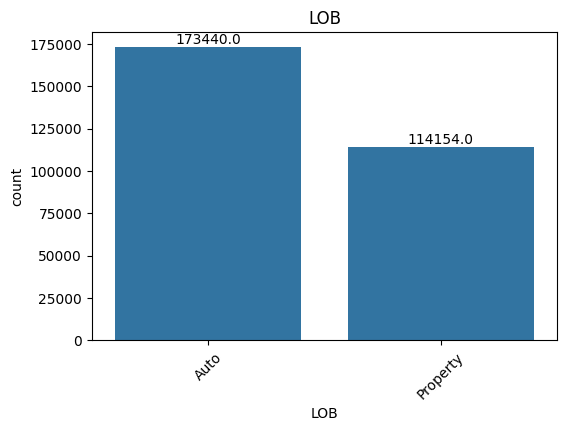

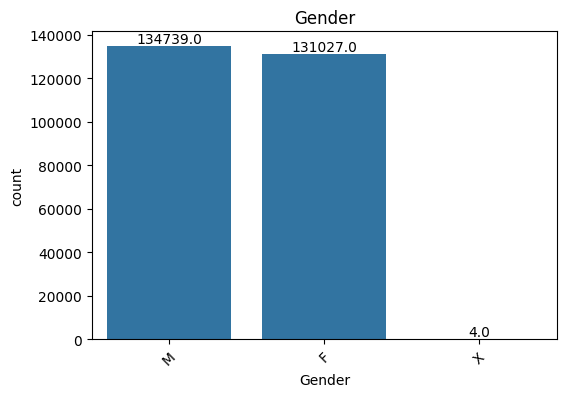

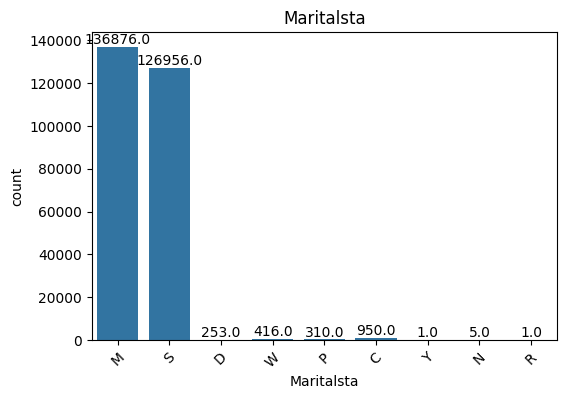

In [45]:
for column in ['LOB','Gender','Maritalsta']:
    plt.figure(figsize=(6,4))
    sns.countplot(x=column, data=policy_data)
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')
    plt.title(column)
    plt.xticks(rotation=45)
    plt.show()

In [32]:
policy_data[numerical_columns].head()

,Age_FirstWritten,Min_Continued_Ins,Driver_Count,Vehicle_Count,Years_Licensed_at_FW,Licsusp6yr,Licsusp,Inscancl3y,Matmisrepr,FirstTerm_Premium,SecondTerm_Premium,ThirdTerm_Premium
0,57.0,NaN,1.0,1.0,32.777550,0.0,0.0,0.0,0.0,3953.0,3953.0,3953.0
1,39.0,NaN,1.0,1.0,22.297057,0.0,0.0,0.0,0.0,2378.0,2731.0,2731.0
2,60.0,NaN,1.0,1.0,25.010267,0.0,0.0,0.0,0.0,8022.0,8022.0,8022.0
3,60.0,NaN,4.0,1.0,24.999316,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


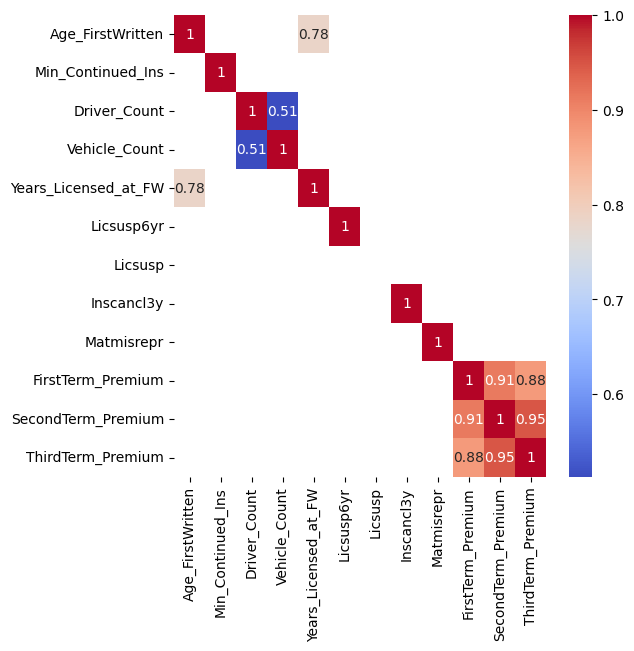

In [42]:
# Compute the correlation matrix
correlation_matrix = policy_data[numerical_columns].corr()
# Create a mask for values outside the desired range
mask = ~((correlation_matrix >= 0.5) | (correlation_matrix <= -0.5))
# Create the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm')
plt.show()
